Task 2: Credit Risk Prediction

##Objective
To predict whether a loan applicant is likely to default using machine learning classification models.

##Dataset Information
- Dataset Name: Loan Prediction Dataset
- Source:Kaggle
- Target Variable: `Loan_Status`
- Features: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, etc.


##import the libararies and load the dataset

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.impute import SimpleImputer

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.linear_model import LogisticRegression

In [50]:
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [6]:
df = pd.read_csv(r'D:\pythin\train_u6lujuX_CVtuZ9i (1).csv')  
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##understanding the dataset

In [7]:
print("Shape of dataset:", df.shape)

Shape of dataset: (614, 13)


In [8]:
print("\nColumns:", df.columns.tolist())


Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [9]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2   

##Handle Missing Data
#Count missing values
##Data Cleaning
- Imputed missing numeric columns (e.g., `LoanAmount`, `Credit_History`) using median.
- Imputed missing categorical columns using the mode.
- All categorical variables were label-encoded.

In [10]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


##Fill numeric missing values with median

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns

In [16]:
num_imputer = SimpleImputer(strategy="median")

In [21]:
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [22]:
cat_imputer = SimpleImputer(strategy="most_frequent")

In [23]:
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

##Encode categorical variable 

In [24]:
encoder = LabelEncoder()

In [25]:
for c in cat_cols:
    df[c] = encoder.fit_transform(df[c].astype(str))

##EDA – Visualize Key Features
- Explored `ApplicantIncome` and `LoanAmount` with histograms.
- Analyzed variation in `LoanAmount` across education levels using boxplots.
- Insight: Graduates may request higher loans; income distribution is skewed.

In [26]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

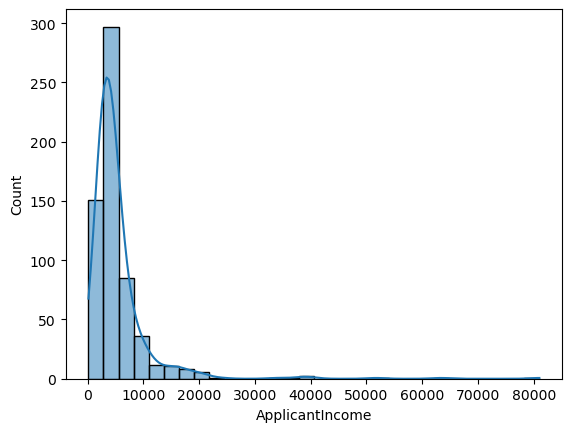

In [27]:
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)

Text(0.5, 1.0, 'Applicant Income Distribution')

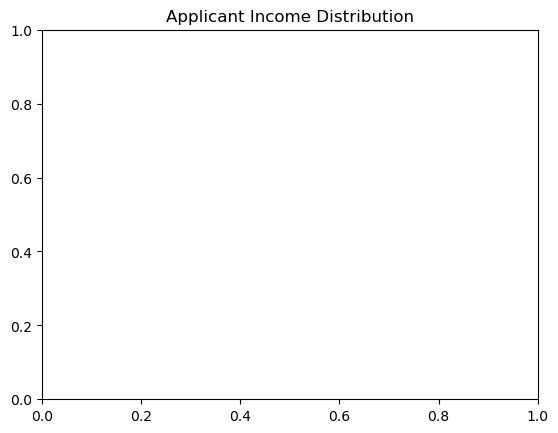

In [28]:
plt.title("Applicant Income Distribution")

In [29]:
plt.show()

In [30]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Education', ylabel='LoanAmount'>

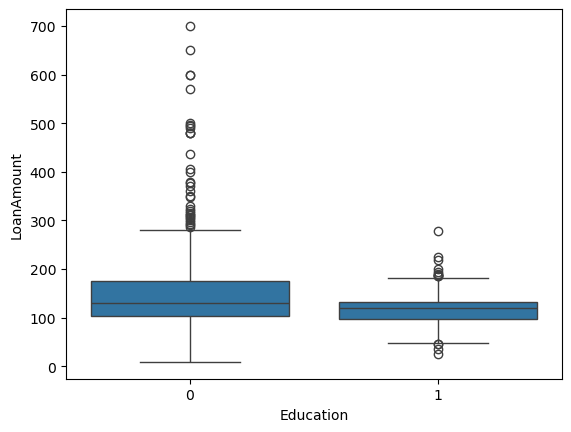

In [31]:
sns.boxplot(x='Education', y='LoanAmount', data=df)

Text(0.5, 1.0, 'LoanAmount by Education Level')

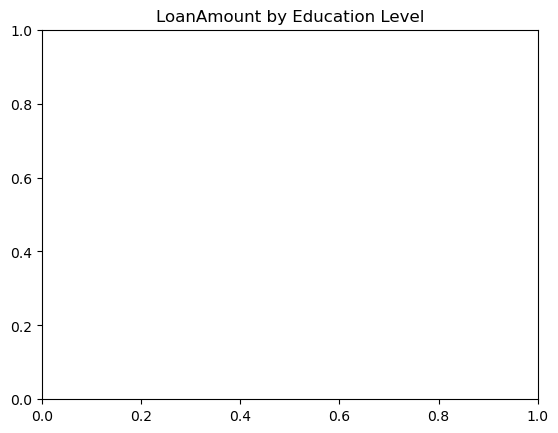

In [32]:
plt.title("LoanAmount by Education Level")

In [33]:
plt.show()

In [34]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='LoanAmount', ylabel='Count'>

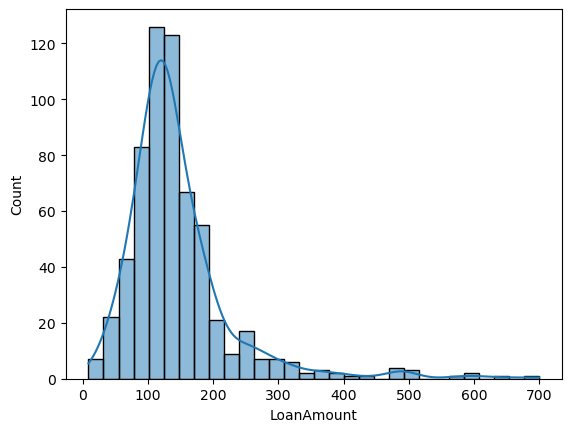

In [35]:
sns.histplot(df['LoanAmount'], bins=30, kde=True)

Text(0.5, 1.0, 'LoanAmount Distribution')

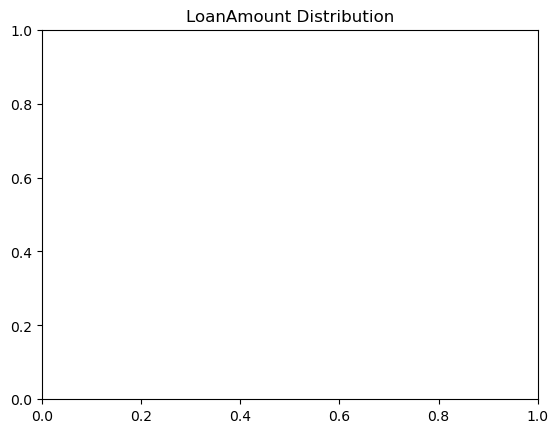

In [36]:
plt.title("LoanAmount Distribution")

In [37]:
plt.show()

##Prepare the data for modeling 

In [38]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)

In [39]:
y = df['Loan_Status']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##Train the model(Logistic regression) 
- Train/Test Split:80/20 stratified  
- Tools:pandas, scikit-learn, seaborn, matplotlib

In [51]:
 scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)

In [53]:
X_test_scaled = scaler.transform(X_test)

In [54]:
model = LogisticRegression(max_iter=1000, solver='liblinear')

In [55]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [56]:
y_pred = model.predict(X_test_scaled)

##Model Evaluation
- Accuracy:printed during runtime 
- Confusion Matrix:visualized using `ConfusionMatrixDisplay`

In [57]:
acc = accuracy_score(y_test, y_pred)

In [58]:
cm = confusion_matrix(y_test, y_pred)

In [59]:
print("Accuracy Score:", round(acc, 4))

Accuracy Score: 0.8618


In [60]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[22 16]
 [ 1 84]]


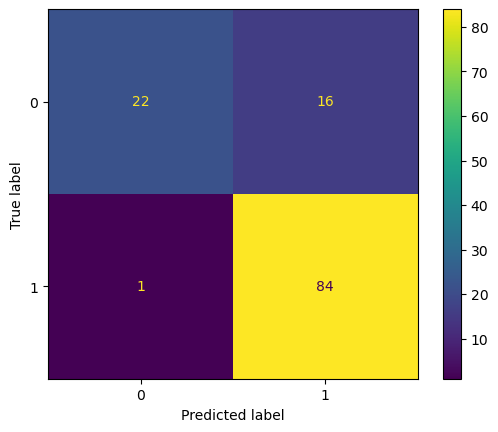

In [61]:
ConfusionMatrixDisplay(cm).plot()

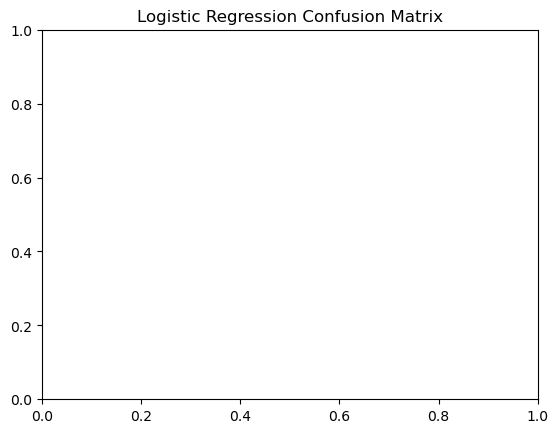

In [62]:
plt.title("Logistic Regression Confusion Matrix")
plt.show()

##Results
- Baseline accuracy achieved with logistic regression.
- Typically important features: `Credit_History`, `ApplicantIncome`, `LoanAmount`, `Property_Area`.
- Ideal next steps: Feature engineering, model tuning (e.g., Decision Trees or Random Forests).
##Conclusion 
##Logistic Regression provides a solid baseline.
##Influential features likely include Credit_History, ApplicantIncome,
##LoanAmount, and Property_Area.